This file intends to solve the following questions:
    - enrich the results by adding number of fans of each influencers
    - add bar charts for each one in the results

In [40]:
import sys
import os,glob
import re, numpy as np, pandas as pd
from pprint import pprint
from scipy.spatial import distance
import matplotlib.pyplot as plt

# Import similarity from previous notebook

In [41]:
vector = pd.read_csv('/Users/hellofutrue/Desktop/Insight/Python/Feb/files/vector.csv')
vector = vector.set_index('Unnamed: 0') #index = influencer's name

In [42]:
vector

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
Unnamed: 0,,,,,,,,,,
sleepinthegardn,0.028749,0.151918,0.074005,0.048262,0.144344,0.085750,0.270528,0.037877,0.046313,0.112252
abigailratchford,0.025882,0.110137,0.073118,0.043450,0.143270,0.077200,0.296833,0.074043,0.055007,0.101059
adrianalima,0.030083,0.112538,0.077440,0.050502,0.135568,0.089730,0.298578,0.039635,0.048462,0.117463
alexandradaddario,0.030556,0.098586,0.078658,0.067016,0.137700,0.091141,0.287551,0.040258,0.049224,0.119310
alexa_bliss_wwe_,0.030268,0.098540,0.078271,0.050571,0.136245,0.106450,0.287147,0.041008,0.049350,0.122151
alexisren,0.029181,0.094146,0.090130,0.048987,0.131498,0.102051,0.274595,0.053455,0.047008,0.128949
aliciakeys,0.041084,0.101540,0.069872,0.059531,0.150250,0.080961,0.311289,0.035761,0.043726,0.105984
alissaviolet,0.030084,0.112544,0.077444,0.050505,0.135575,0.089735,0.283114,0.039637,0.048465,0.132896
alyraisman,0.033984,0.095503,0.080867,0.049220,0.135775,0.089994,0.268937,0.029569,0.070791,0.145361


# Change the candidate space to be only growing influencers

### Read in the growing fashion influencer list

In [43]:
f = open('/Users/hellofutrue/Desktop/Insight/Python/Feb/files/growing_fashion_influencer_list.txt', 'r')
list = f.readlines()
f.close()
cadid_list = list[0].split()

In [44]:
cadid_list

['gigihadid',
 'chrissyteigen',
 'russwest44',
 'rubyrose',
 'brunomars',
 'alissaviolet',
 'shaymitchell',
 'colleen',
 'brittanya187',
 'karrueche',
 'bellahadid',
 'haileybieber',
 'kingbach',
 'caradelevingne',
 'emrata',
 'alexisren',
 'britneyspears',
 'hilaryduff',
 'sabrinacarpenter',
 'badbunnypr',
 'jordynwoods',
 'lacikaysomers',
 'joeyking',
 'aliciakeys',
 'supremenewyork',
 'bundleofbrittany',
 'victoriajustice',
 'melissamccarthy',
 'virginia',
 'camila_cabello',
 'sophiet',
 'tylerrjoseph',
 'emmaroberts',
 'jessicabiel',
 'gisele',
 'ocasio2018',
 'nattyiceofficial',
 'dearra',
 'hennessycarolina',
 'kuz',
 'thehughjackman',
 'charliesangelll',
 'drayamichele',
 'lizzzak',
 'augustalsina',
 'saquon',
 'hannahstocking',
 'demirosemawby',
 'blacchyna',
 'keke',
 'chanteljeffries',
 'vanilladingdong',
 'zionlw10',
 'realberniceburgos',
 'bensimmons',
 'yarashahidi',
 'jessicasimpson',
 'theshaderoom',
 'carlibel',
 'ashleygraham',
 'sofiavergara',
 'antoniiogarza',
 'jens

In [45]:
def dst(nameinput):
    dst = pd.DataFrame()
    for people in cadid_list:
        row = vector.loc[nameinput, : ].values
        other = vector.loc[people, : ].values
        score = pd.DataFrame(distance.euclidean(row, other),index=[people], columns=[nameinput])
        dst = dst.append(score)
    result = dst.sort_values([nameinput], ascending=[1])[1:6]
    return result

In [114]:
result = dst('nickiminaj')

In [115]:
result

,nickiminaj
saraunderwood,0.0
wolfiecindy,0.0
jccaylen,0.0
winnieharlow,0.0
drayamichele,0.0


# Import outside database

In [48]:
database = pd.read_csv('/Users/hellofutrue/Desktop/Insight/Python/Untitled Folder/Full_inluencer_list.csv')

In [49]:
database = database.drop_duplicates(keep='last') #drop the duplicates in the df

In [51]:
def toINT(text):
    if text[-1]=='M':
        return float(text.replace('M',''))*10**6
    if text[-1]=='B':
        return float(text.replace('B',''))*10**9
    if text[-1]=='k':
        return float(text.replace('k',''))*10**3

In [52]:
database["fanbase"] = database["fanbase"].apply(lambda x: toINT(x))

In [53]:
database

,name,realname,type,fanbase
50,ddlovato,Demi Lovato @ddlovato,\nSinger\nSongwriting\nMusic\n,71000000.0
51,kyliejenner,Kylie @kyliejenner,\nModeling\n,126500000.0
52,beyonce,Beyoncé @beyonce,\nSinger\n,123800000.0
53,iamcardib,CARDIVENOM @iamcardib,\nSinger\n,40800000.0
54,selenagomez,Selena Gomez @selenagomez,\nActors\n,145500000.0
55,kingjames,LeBron James @kingjames,\nBasketball\nSports\n,46900000.0
56,zendaya,Zendaya @zendaya,\nActors\n,54200000.0
57,badgalriri,badgalriri @badgalriri,\nSinger\n,67400000.0
58,arianagrande,Ariana Grande @arianagrande,\nSinger\nActors\n,145000000.0
59,kimkardashian,Kim Kardashian West @kimkardashian,\nActors\n,127100000.0


# Add fanbase info. to the result

In [116]:
result.index

Index(['saraunderwood', 'wolfiecindy', 'jccaylen', 'winnieharlow',
       'drayamichele'],
      dtype='object')

In [127]:
for name in result.index:
    result.set_value(name, 'fanbase',database.loc[database['name'] == name]['fanbase'])

/Users/hellofutrue/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [119]:
result

,nickiminaj,fanbase
saraunderwood,0.0,9200000.0
wolfiecindy,0.0,5100000.0
jccaylen,0.0,3500000.0
winnieharlow,0.0,5600000.0
drayamichele,0.0,7100000.0


In [58]:
fanbase_lowerbound = max(result['fanbase'])
fanbase_lowerbound

9200000.0

In [59]:
fanbase_upperbound = sum(result['fanbase'])
fanbase_upperbound

30500000.0

In [60]:
print('The estimated fan base of all 5 suggested ambassadors ranges from', fanbase_lowerbound,'to',fanbase_upperbound)

The estimated fan base of all 5 suggested ambassadors ranges from 9200000.0 to 30500000.0


# Adjust the output of the similarity score

In [121]:
result = result.assign(Similarity = result.iloc[:,0])

In [122]:
result['Similarity']

saraunderwood    0.0
wolfiecindy      0.0
jccaylen         0.0
winnieharlow     0.0
drayamichele     0.0
Name: Similarity, dtype: float64

In [125]:
result.loc[result['Similarity'] <= 0.001, 'Similarity'] = 'Extremely similar'

TypeError: '<=' not supported between instances of 'str' and 'float'

In [126]:
result

,nickiminaj,fanbase,Similarity
saraunderwood,0.0,9200000.0,Extremely similar
wolfiecindy,0.0,5100000.0,Extremely similar
jccaylen,0.0,3500000.0,Extremely similar
winnieharlow,0.0,5600000.0,Extremely similar
drayamichele,0.0,7100000.0,Extremely similar


# Bar charts on topic distribution

In [38]:
topic_name = ['Topic 1','Topic 2','Topic 3','Topic 4','Topic 5','Topic 6','Topic 7','Topic 8','Topic 9','Topic 10']

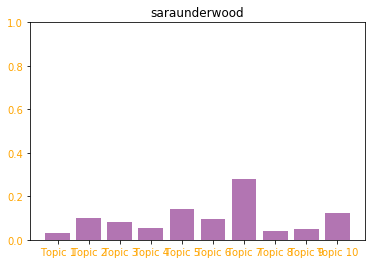

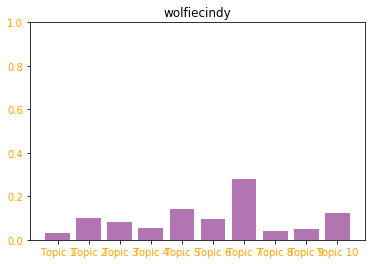

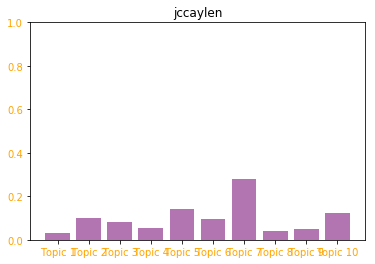

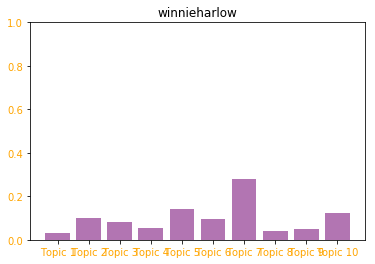

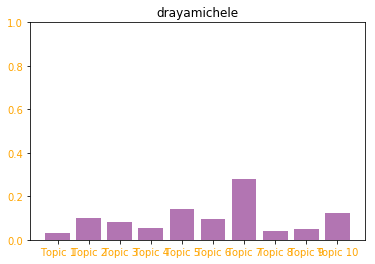

In [39]:
for name in result.index:
    y_pos = vector.loc[name,:]
    bars = topic_name
    plt.bar(bars,y_pos,color = (0.5,0.1,0.5,0.6))
    # Create names on the x-axis
    plt.xticks(bars, color='orange')
    plt.yticks(color='orange')
    plt.ylim(0,1) # Limits for the Y axis
    plt.title(name)
    
    plt.show()